In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Mounted at /content/drive


In [2]:
# import the data
df_clients = pd.read_excel('/content/drive/MyDrive/Hackaton/Code/clients.xlsx')
df_complaints = pd.read_excel('/content/drive/MyDrive/Hackaton/Code/complaints.xlsx')

df_merge=df_complaints.merge(df_clients,on='customerID', how='left')

# Averages Per Column

In [3]:
averages_list = []

for churn_value in ['Yes', 'No']:
    row = {}
    row['Churn_Status'] = 'Churn' if churn_value == 'Yes' else 'No Churn'

    # Numerical mappings
    df_merge['gender_numerical'] = df_merge['gender'].map({'Male': 1, 'Female': 0})
    df_merge['Partner_numerical'] = df_merge['Partner'].map({'Yes': 1, 'No': 0})
    df_merge['Dependents_numerical'] = df_merge['Dependents'].map({'Yes': 1, 'No': 0})
    df_merge['PhoneService_numerical'] = df_merge['PhoneService'].map({'Yes': 1, 'No': 0})
    df_merge['MultipleLines_numerical'] = df_merge['MultipleLines'].map({'Yes': 1, 'No': 0})
    df_merge['OnlineSecurity_numerical'] = df_merge['OnlineSecurity'].map({'Yes': 1, 'No': 0})
    df_merge['OnlineBackup_numerical'] = df_merge['OnlineBackup'].map({'Yes': 1, 'No': 0})
    df_merge['DeviceProtection_numerical'] = df_merge['DeviceProtection'].map({'Yes': 1, 'No': 0})
    df_merge['TechSupport_numerical'] = df_merge['TechSupport'].map({'Yes': 1, 'No': 0})
    df_merge['StreamingTV_numerical'] = df_merge['StreamingTV'].map({'Yes': 1, 'No': 0})
    df_merge['StreamingMovies_numerical'] = df_merge['StreamingMovies'].map({'Yes': 1, 'No': 0})
    df_merge['PaperlessBilling_numerical'] = df_merge['PaperlessBilling'].map({'Yes': 1, 'No': 0})

    # Averages for given churn group
    row['ave_churn_age'] = df_merge[df_merge['Churn'] == churn_value]['SeniorCitizen'].mean()
    row['ave_churn_gender'] = df_merge[df_merge['Churn'] == churn_value]['gender_numerical'].mean()
    row['ave_churn_complaints'] = df_merge[df_merge['Churn'] == churn_value]['complaint_number'].mean()
    row['ave_churn_partner'] = df_merge[df_merge['Churn'] == churn_value]['Partner_numerical'].mean()
    row['Dependents_numerical'] = df_merge[df_merge['Churn'] == churn_value]['Dependents_numerical'].mean()
    row['ave_churn_tenure'] = df_merge[df_merge['Churn'] == churn_value]['tenure'].mean()
    row['ave_churn_PhoneService'] = df_merge[df_merge['Churn'] == churn_value]['PhoneService_numerical'].mean()

    # Only compute MultipleLines average where PhoneService is Yes
    row['ave_churn_MultipleLines'] = df_merge[
        (df_merge['Churn'] == churn_value) & (df_merge['PhoneService'] == 'Yes')
    ]['MultipleLines_numerical'].mean()

    # Not applicable columns
    row['InternetService'] = 'Not Applicable'
    row['Contract'] = 'Not Applicable'
    row['PaymentMethod'] = 'Not Applicable'
    row['ave_churn_Churn'] = 'Not Applicable'

    # More feature averages
    row['ave_churn_OnlineSecurity'] = df_merge[df_merge['Churn'] == churn_value]['OnlineSecurity_numerical'].mean()
    row['ave_churn_OnlineBackup'] = df_merge[df_merge['Churn'] == churn_value]['OnlineBackup_numerical'].mean()
    row['ave_churn_DeviceProtection'] = df_merge[df_merge['Churn'] == churn_value]['DeviceProtection_numerical'].mean()
    row['ave_churn_TechSupport'] = df_merge[df_merge['Churn'] == churn_value]['TechSupport_numerical'].mean()
    row['ave_churn_StreamingTV'] = df_merge[df_merge['Churn'] == churn_value]['StreamingTV_numerical'].mean()
    row['ave_churn_StreamingMovies'] = df_merge[df_merge['Churn'] == churn_value]['StreamingMovies_numerical'].mean()
    row['ave_churn_PaperlessBilling'] = df_merge[df_merge['Churn'] == churn_value]['PaperlessBilling_numerical'].mean()
    row['ave_churn_MonthlyCharges'] = df_merge[df_merge['Churn'] == churn_value]['MonthlyCharges'].mean()
    row['ave_churn_TotalCharges'] = df_merge[df_merge['Churn'] == churn_value]['TotalCharges'].mean()

    averages_list.append(row)

# Convert list of rows to DataFrame
averages_df = pd.DataFrame(averages_list)
averages_df.iloc[:,:]

,Churn_Status,ave_churn_age,ave_churn_gender,ave_churn_complaints,ave_churn_partner,Dependents_numerical,ave_churn_tenure,ave_churn_PhoneService,ave_churn_MultipleLines,InternetService,...,ave_churn_Churn,ave_churn_OnlineSecurity,ave_churn_OnlineBackup,ave_churn_DeviceProtection,ave_churn_TechSupport,ave_churn_StreamingTV,ave_churn_StreamingMovies,ave_churn_PaperlessBilling,ave_churn_MonthlyCharges,ave_churn_TotalCharges
0,Churn,0.268416,0.489405,2.090817,0.321897,0.161453,18.344097,0.915237,0.517089,Not Applicable,...,Not Applicable,0.173545,0.310053,0.339683,0.208466,0.493122,0.493122,0.765893,76.373259,1577.131181
1,No Churn,0.131922,0.545603,1.985342,0.527687,0.319218,39.237785,0.908795,0.474910,Not Applicable,...,Not Applicable,0.441423,0.487448,0.546025,0.489540,0.510460,0.481172,0.537459,64.597394,2782.393811


# Histograms -> Split into Internet (Green) and No Internet (Red)

In [ ]:
# Separating Internet and No internet
merge_no=df_merge[df_merge['InternetService']=="No"]
merge_yes=df_merge[df_merge['InternetService']!="No"]

# # ______________________________________________________________________________________________________________
# # Yes internet Histograms
# numerical_columns = ['gender',
#        'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
#        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
#        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
#        'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
#        'TotalCharges', 'Churn']

# # Determine the number of rows needed for the mosaic layout
# num_cols = 3  # Number of columns in the mosaic
# num_rows = int(np.ceil(len(numerical_columns) / num_cols))

# # Plot histograms
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
# axes = axes.flatten()

# for i, col in enumerate(numerical_columns):
#     axes[i].hist(merge_yes[col], bins=20, color='green', edgecolor='black', alpha=0.7)
#     axes[i].set_title(f'Histogram of {col}')
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Frequency')


# # Hide unused subplots if any
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()
# print('\n\n\n\n\n\n\n')
# # ______________________________________________________________________________________________________________
# # No internet Histograms
# numerical_columns = ['gender',
#        'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
#        'MultipleLines','Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
#        'TotalCharges', 'Churn']

# # Determine the number of rows needed for the mosaic layout
# num_cols = 3  # Number of columns in the mosaic
# num_rows = int(np.ceil(len(numerical_columns) / num_cols))

# # Plot histograms
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
# axes = axes.flatten()

# for i, col in enumerate(numerical_columns):
#     axes[i].hist(merge_no[col], bins=20, color='red', edgecolor='black', alpha=0.7)
#     axes[i].set_title(f'Histogram of {col}')
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Frequency')


# # Hide unused subplots if any
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()
# # ______________________________________________________________________________________________________________


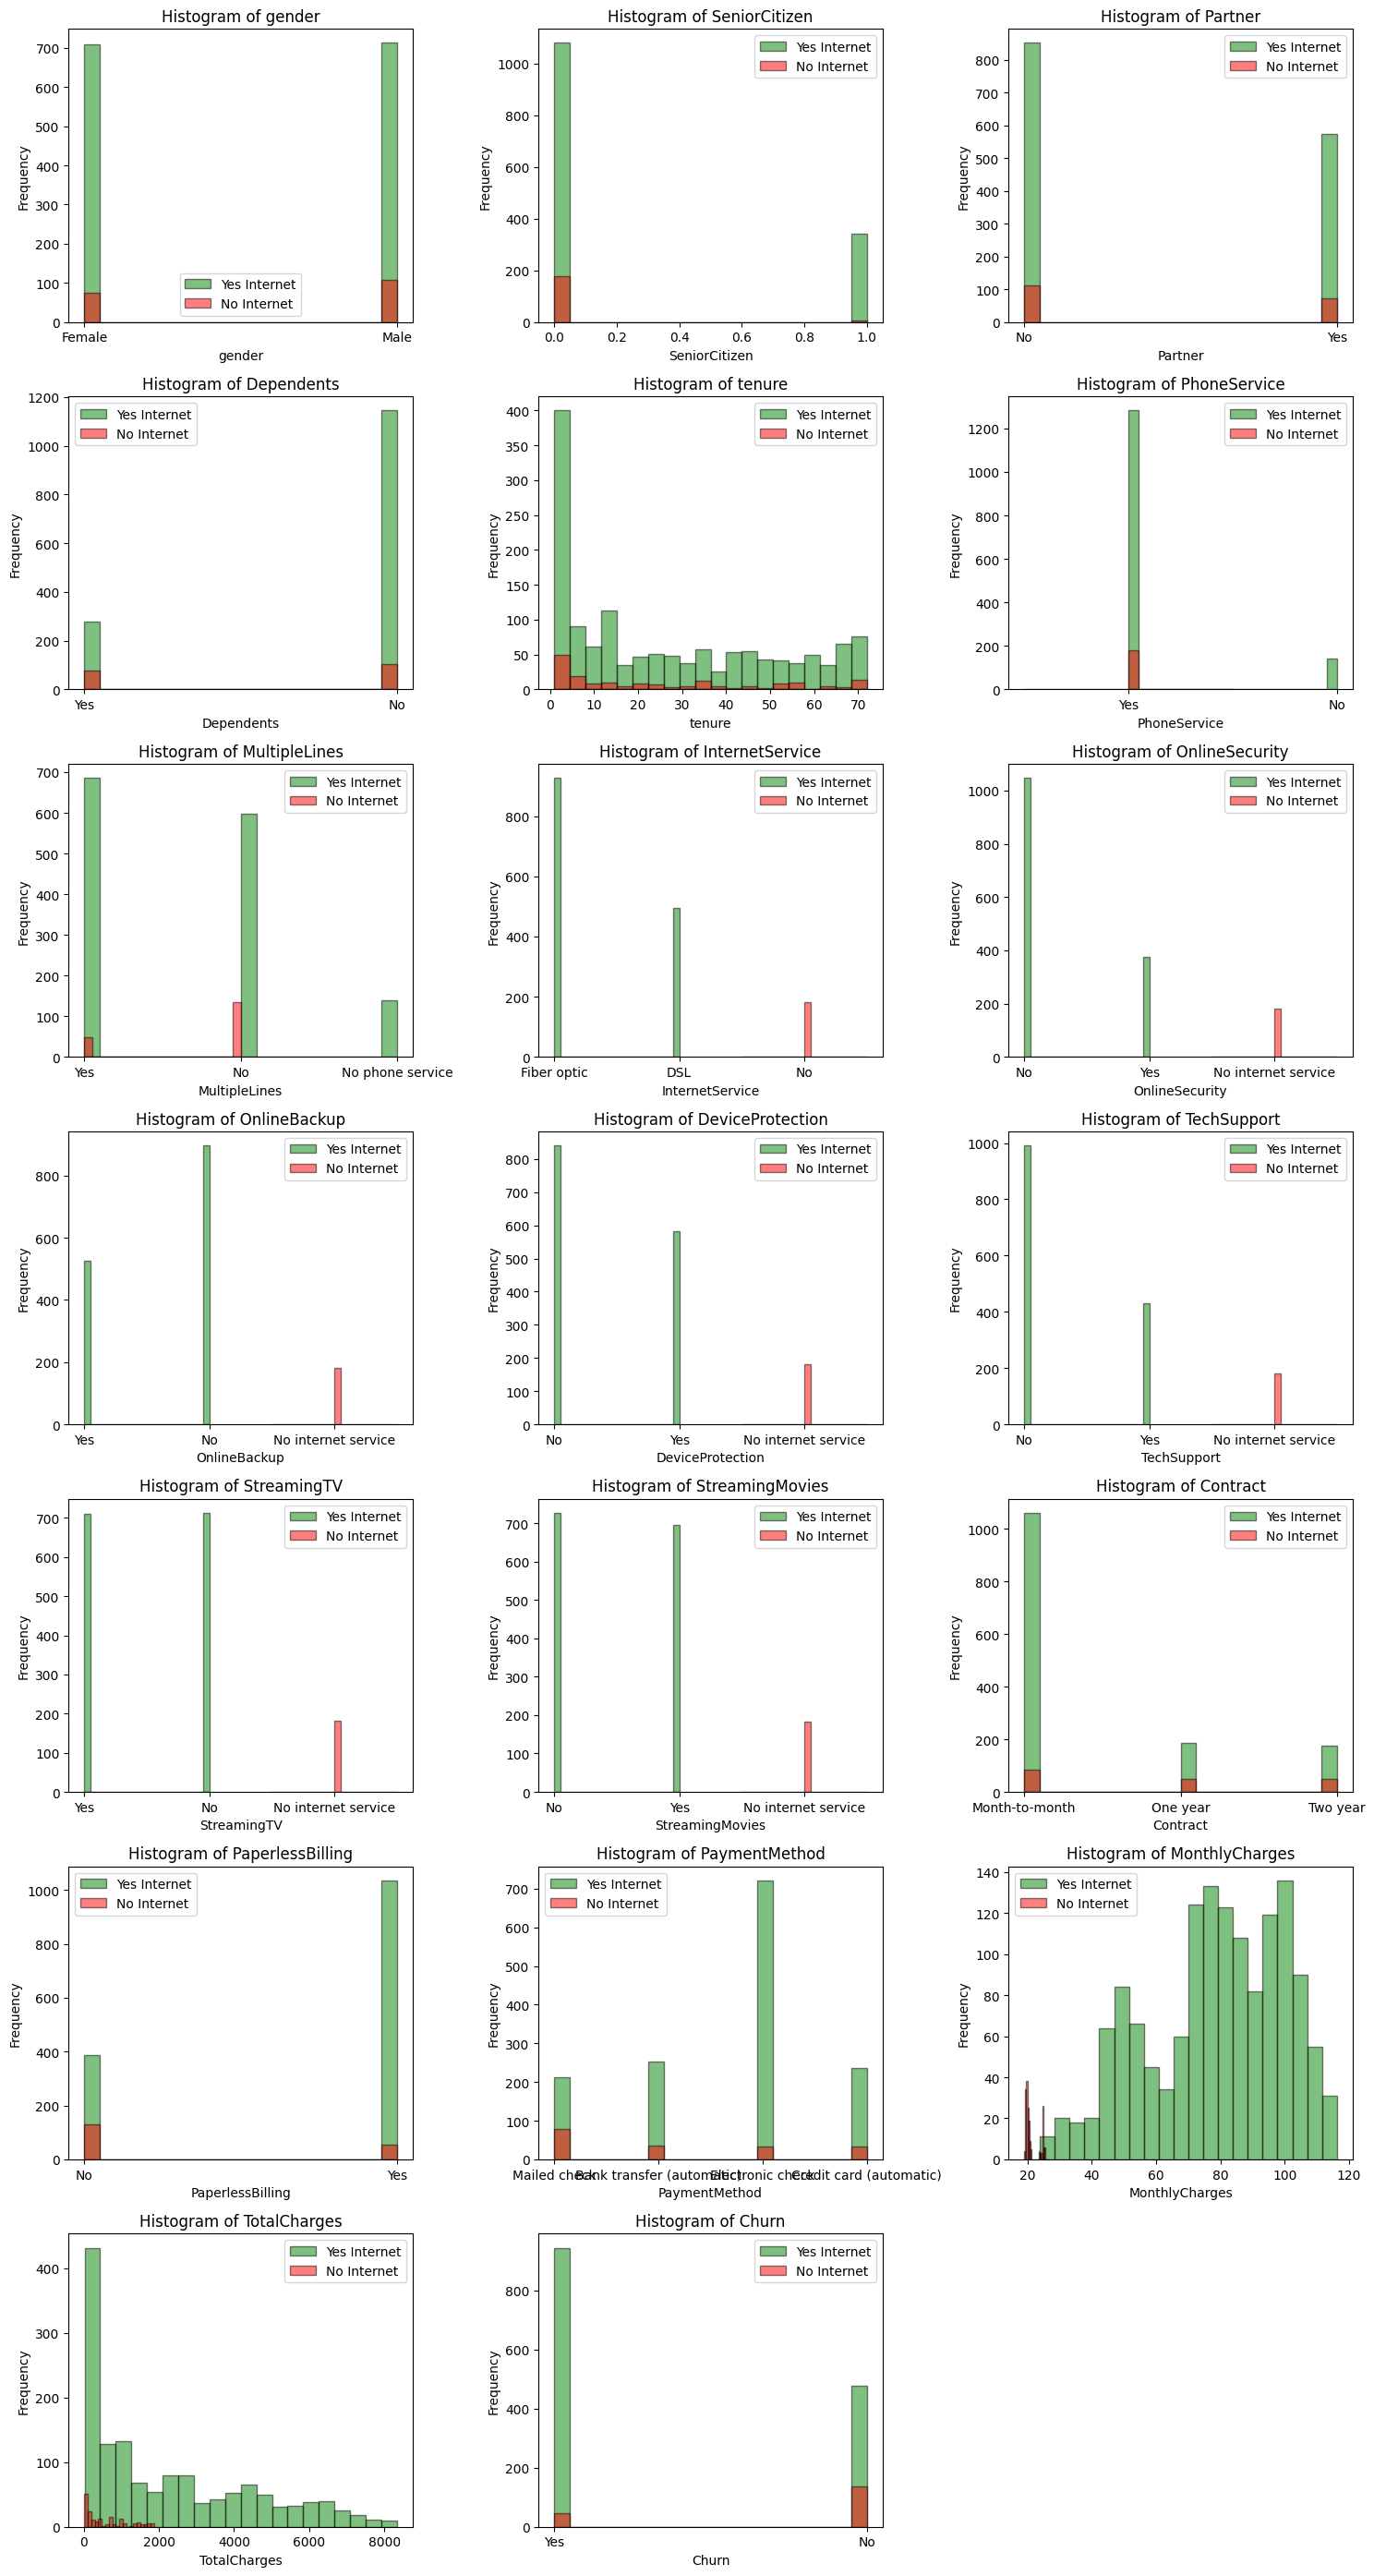

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define columns for the comparison
numerical_columns = ['gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn']

# Determine the number of rows needed for the mosaic layout
num_cols = 3
num_rows = int(np.ceil(len(numerical_columns) / num_cols))

# Plot overlayed histograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].hist(merge_yes[col], bins=20, color='green', edgecolor='black', alpha=0.5, label='Yes Internet')
    axes[i].hist(merge_no[col], bins=20, color='red', edgecolor='black', alpha=0.5, label='No Internet')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


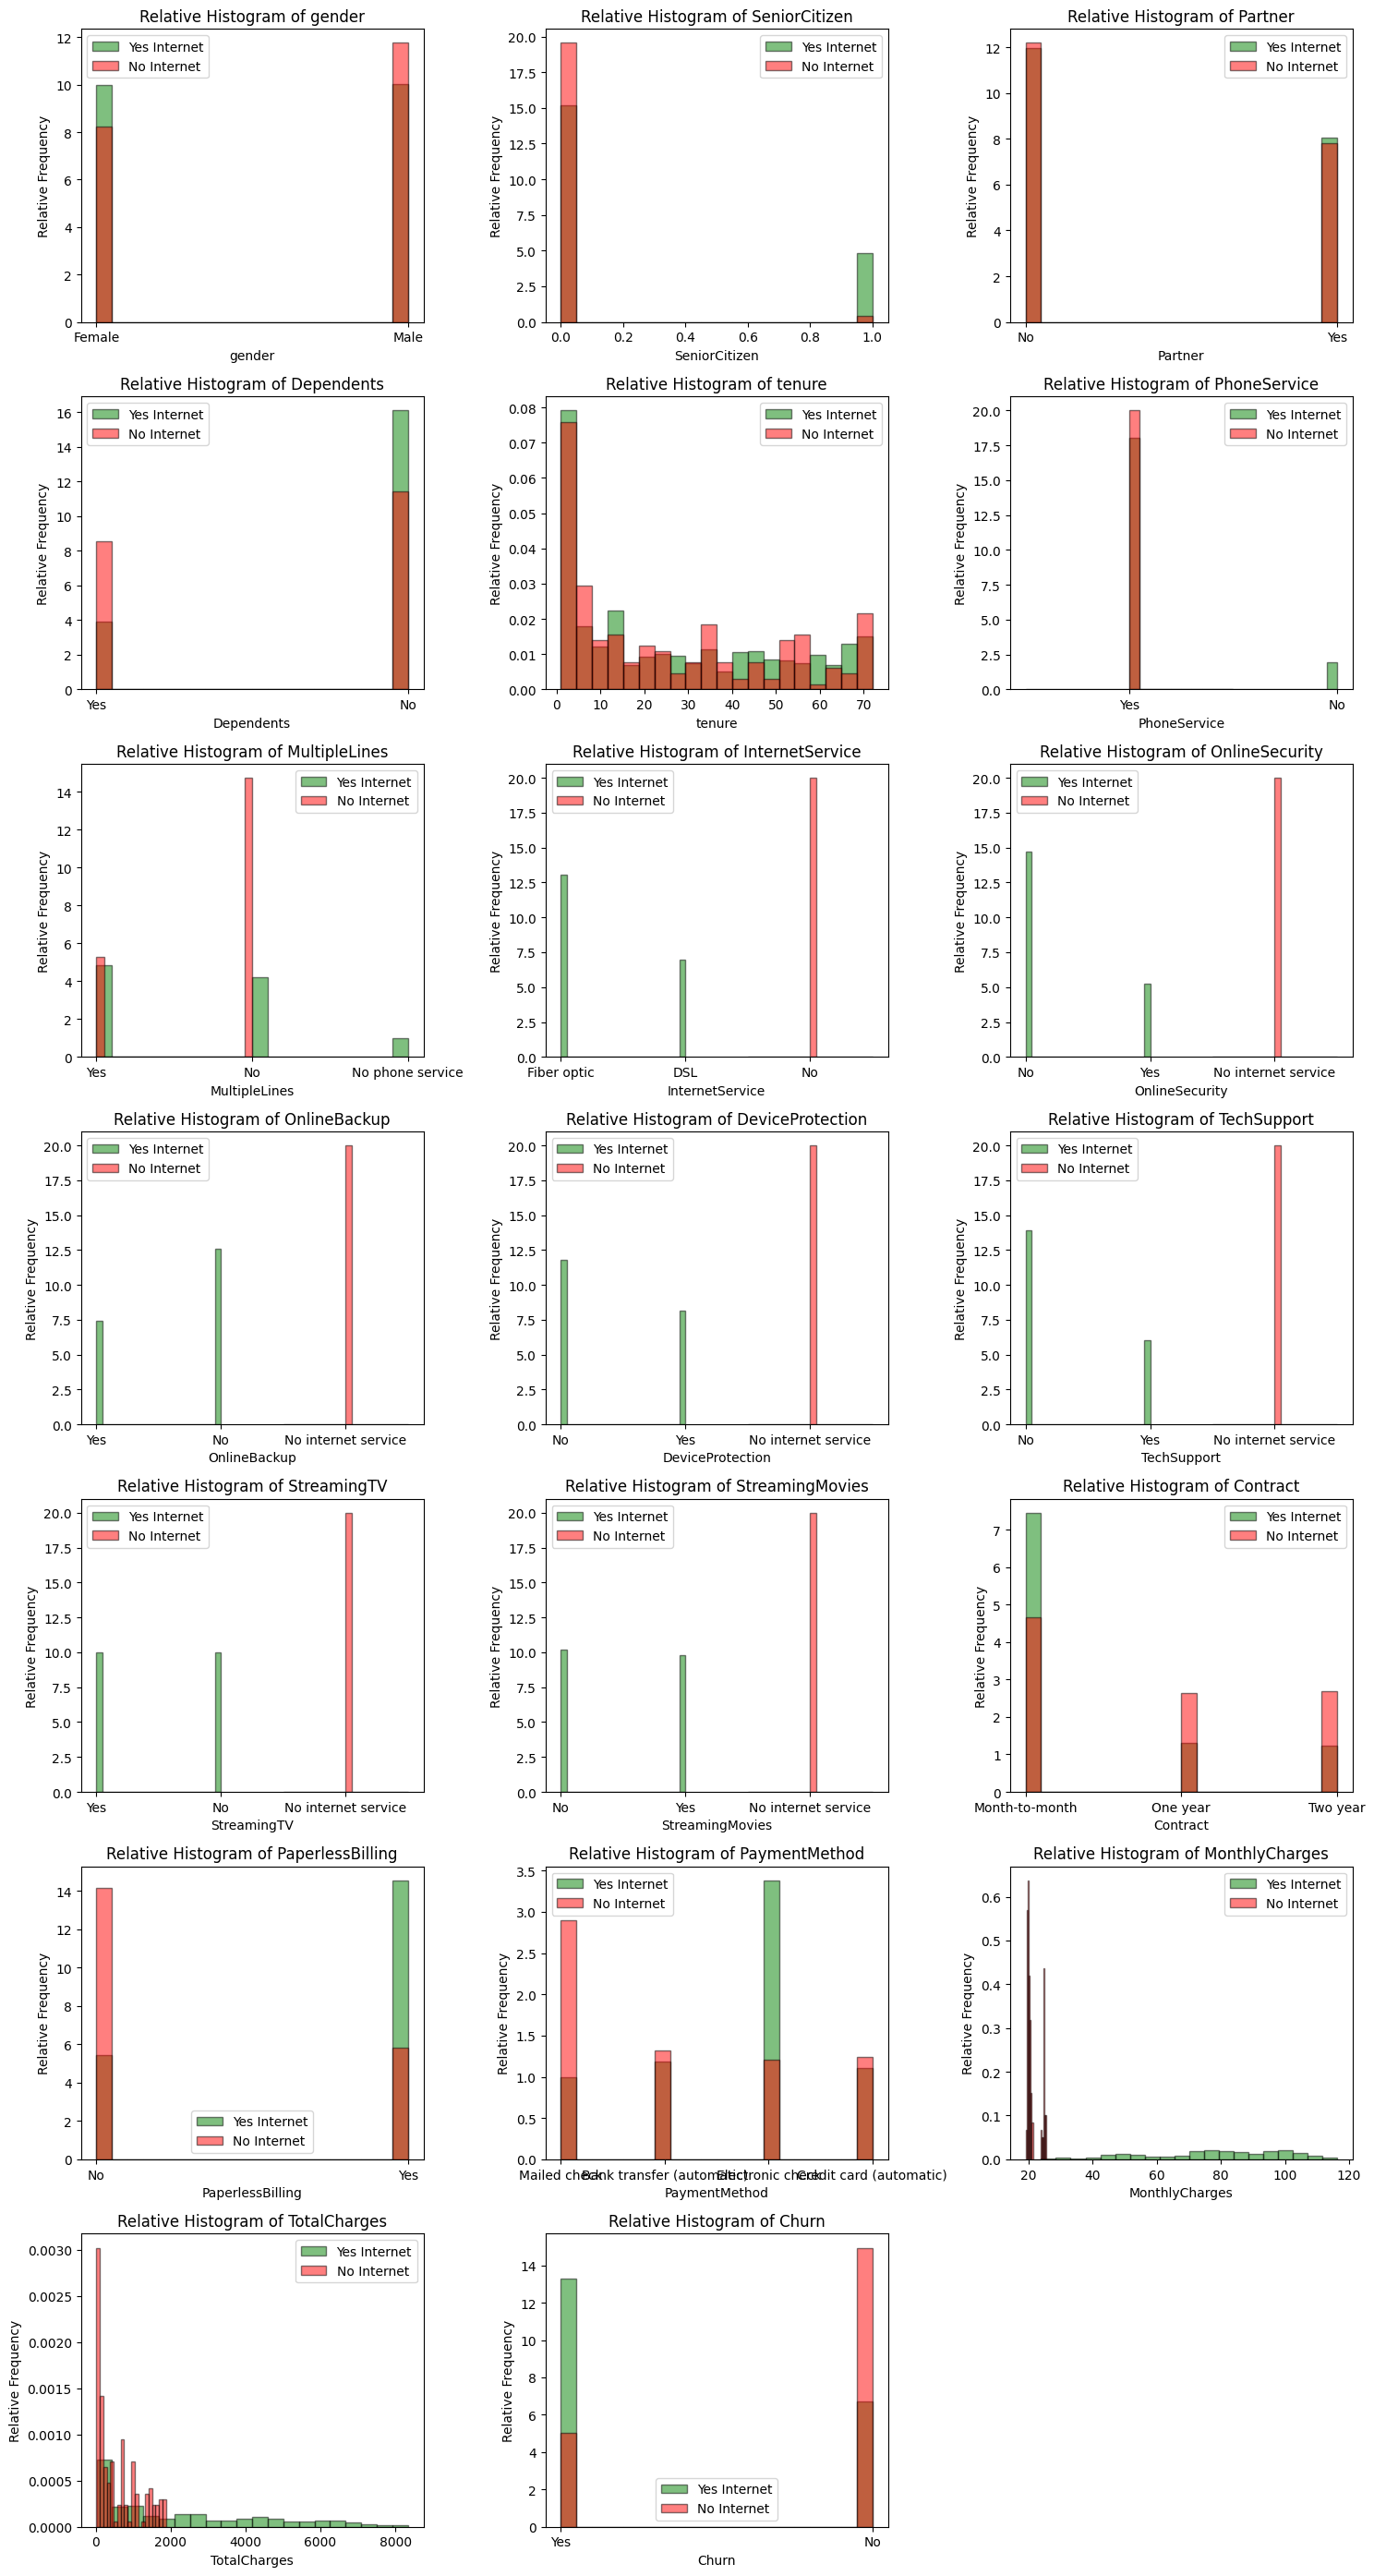

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define columns for the comparison
numerical_columns = ['gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn']

# Determine the number of rows needed for the mosaic layout
num_cols = 3
num_rows = int(np.ceil(len(numerical_columns) / num_cols))

# Plot overlayed **relative frequency** histograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].hist(merge_yes[col], bins=20, color='green', edgecolor='black', alpha=0.5, label='Yes Internet', density=True)
    axes[i].hist(merge_no[col], bins=20, color='red', edgecolor='black', alpha=0.5, label='No Internet', density=True)
    axes[i].set_title(f'Relative Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Relative Frequency')
    axes[i].legend()

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


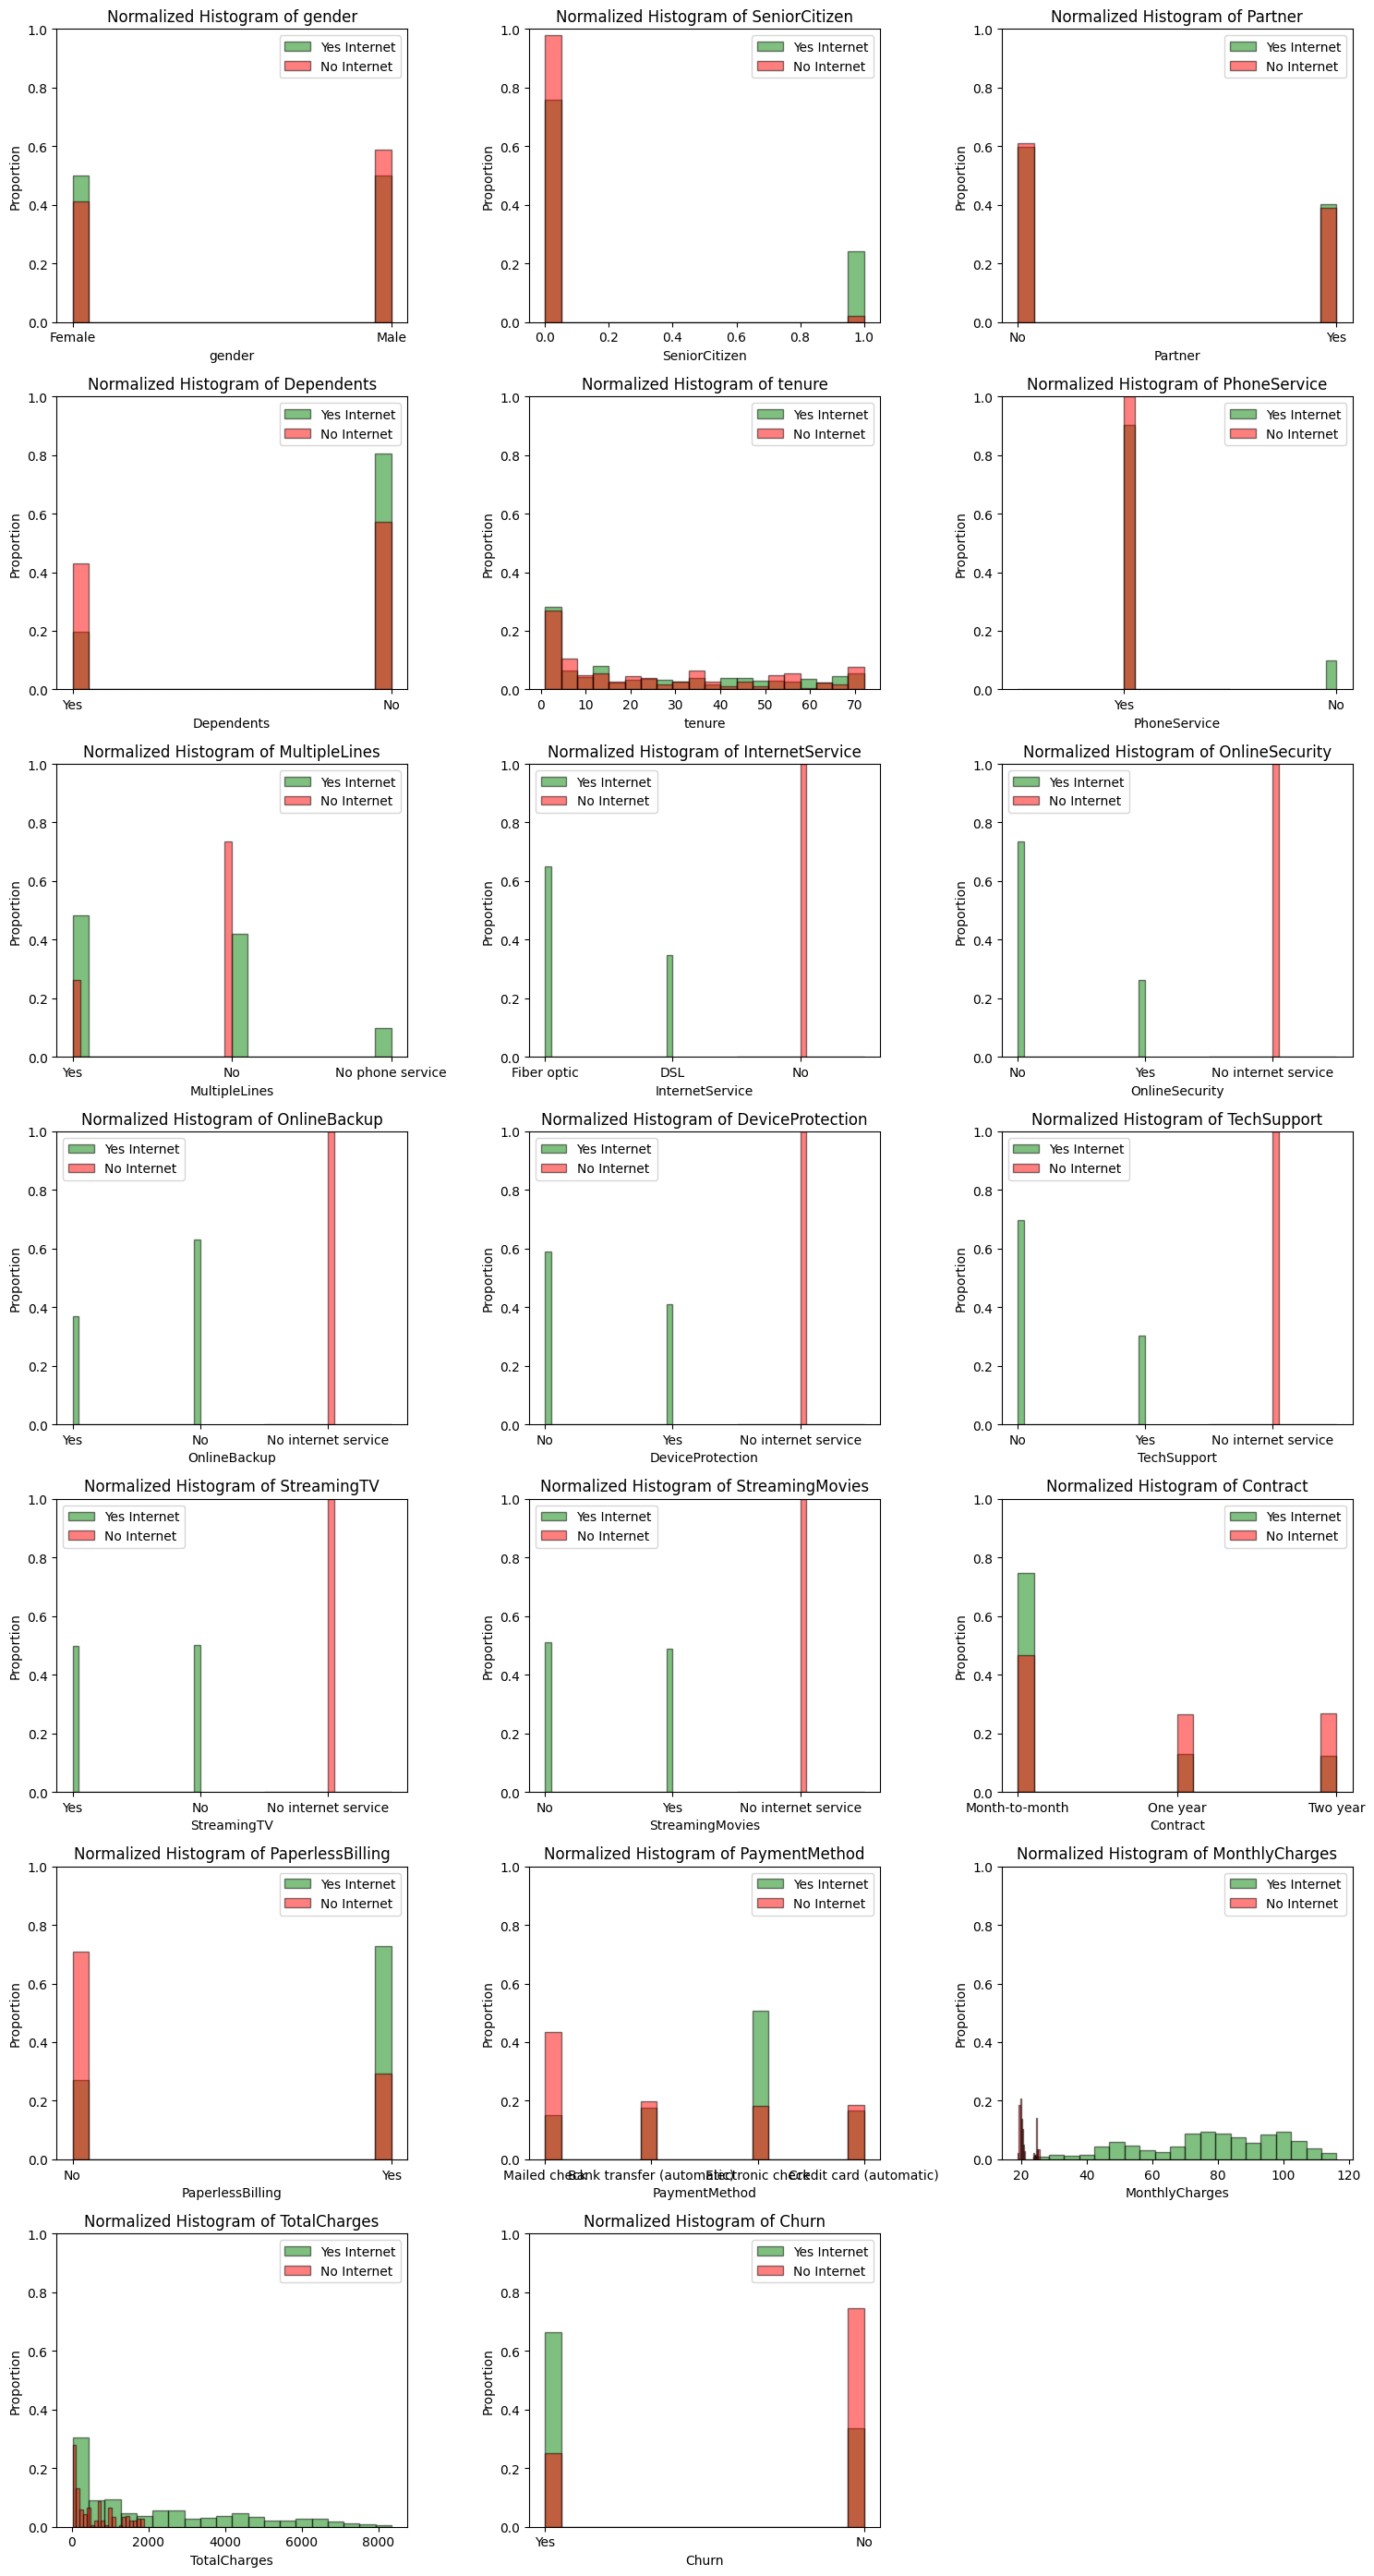

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define columns for the comparison
numerical_columns = ['gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn']

# Determine layout
num_cols = 3
num_rows = int(np.ceil(len(numerical_columns) / num_cols))

# Plot histograms with normalized weights
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    # Drop NaNs to avoid errors
    yes_data = merge_yes[col].dropna()
    no_data = merge_no[col].dropna()

    # Normalize: each bar height reflects proportion
    weights_yes = np.ones(len(yes_data)) / len(yes_data)
    weights_no = np.ones(len(no_data)) / len(no_data)

    axes[i].hist(yes_data, bins=20, alpha=0.5, label='Yes Internet', color='green',
                 weights=weights_yes, edgecolor='black')
    axes[i].hist(no_data, bins=20, alpha=0.5, label='No Internet', color='red',
                 weights=weights_no, edgecolor='black')

    axes[i].set_title(f'Normalized Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].set_ylim(0, 1)
    axes[i].legend()

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
df_merge['Churn'].unique()

array(['Yes', 'No'], dtype=object)

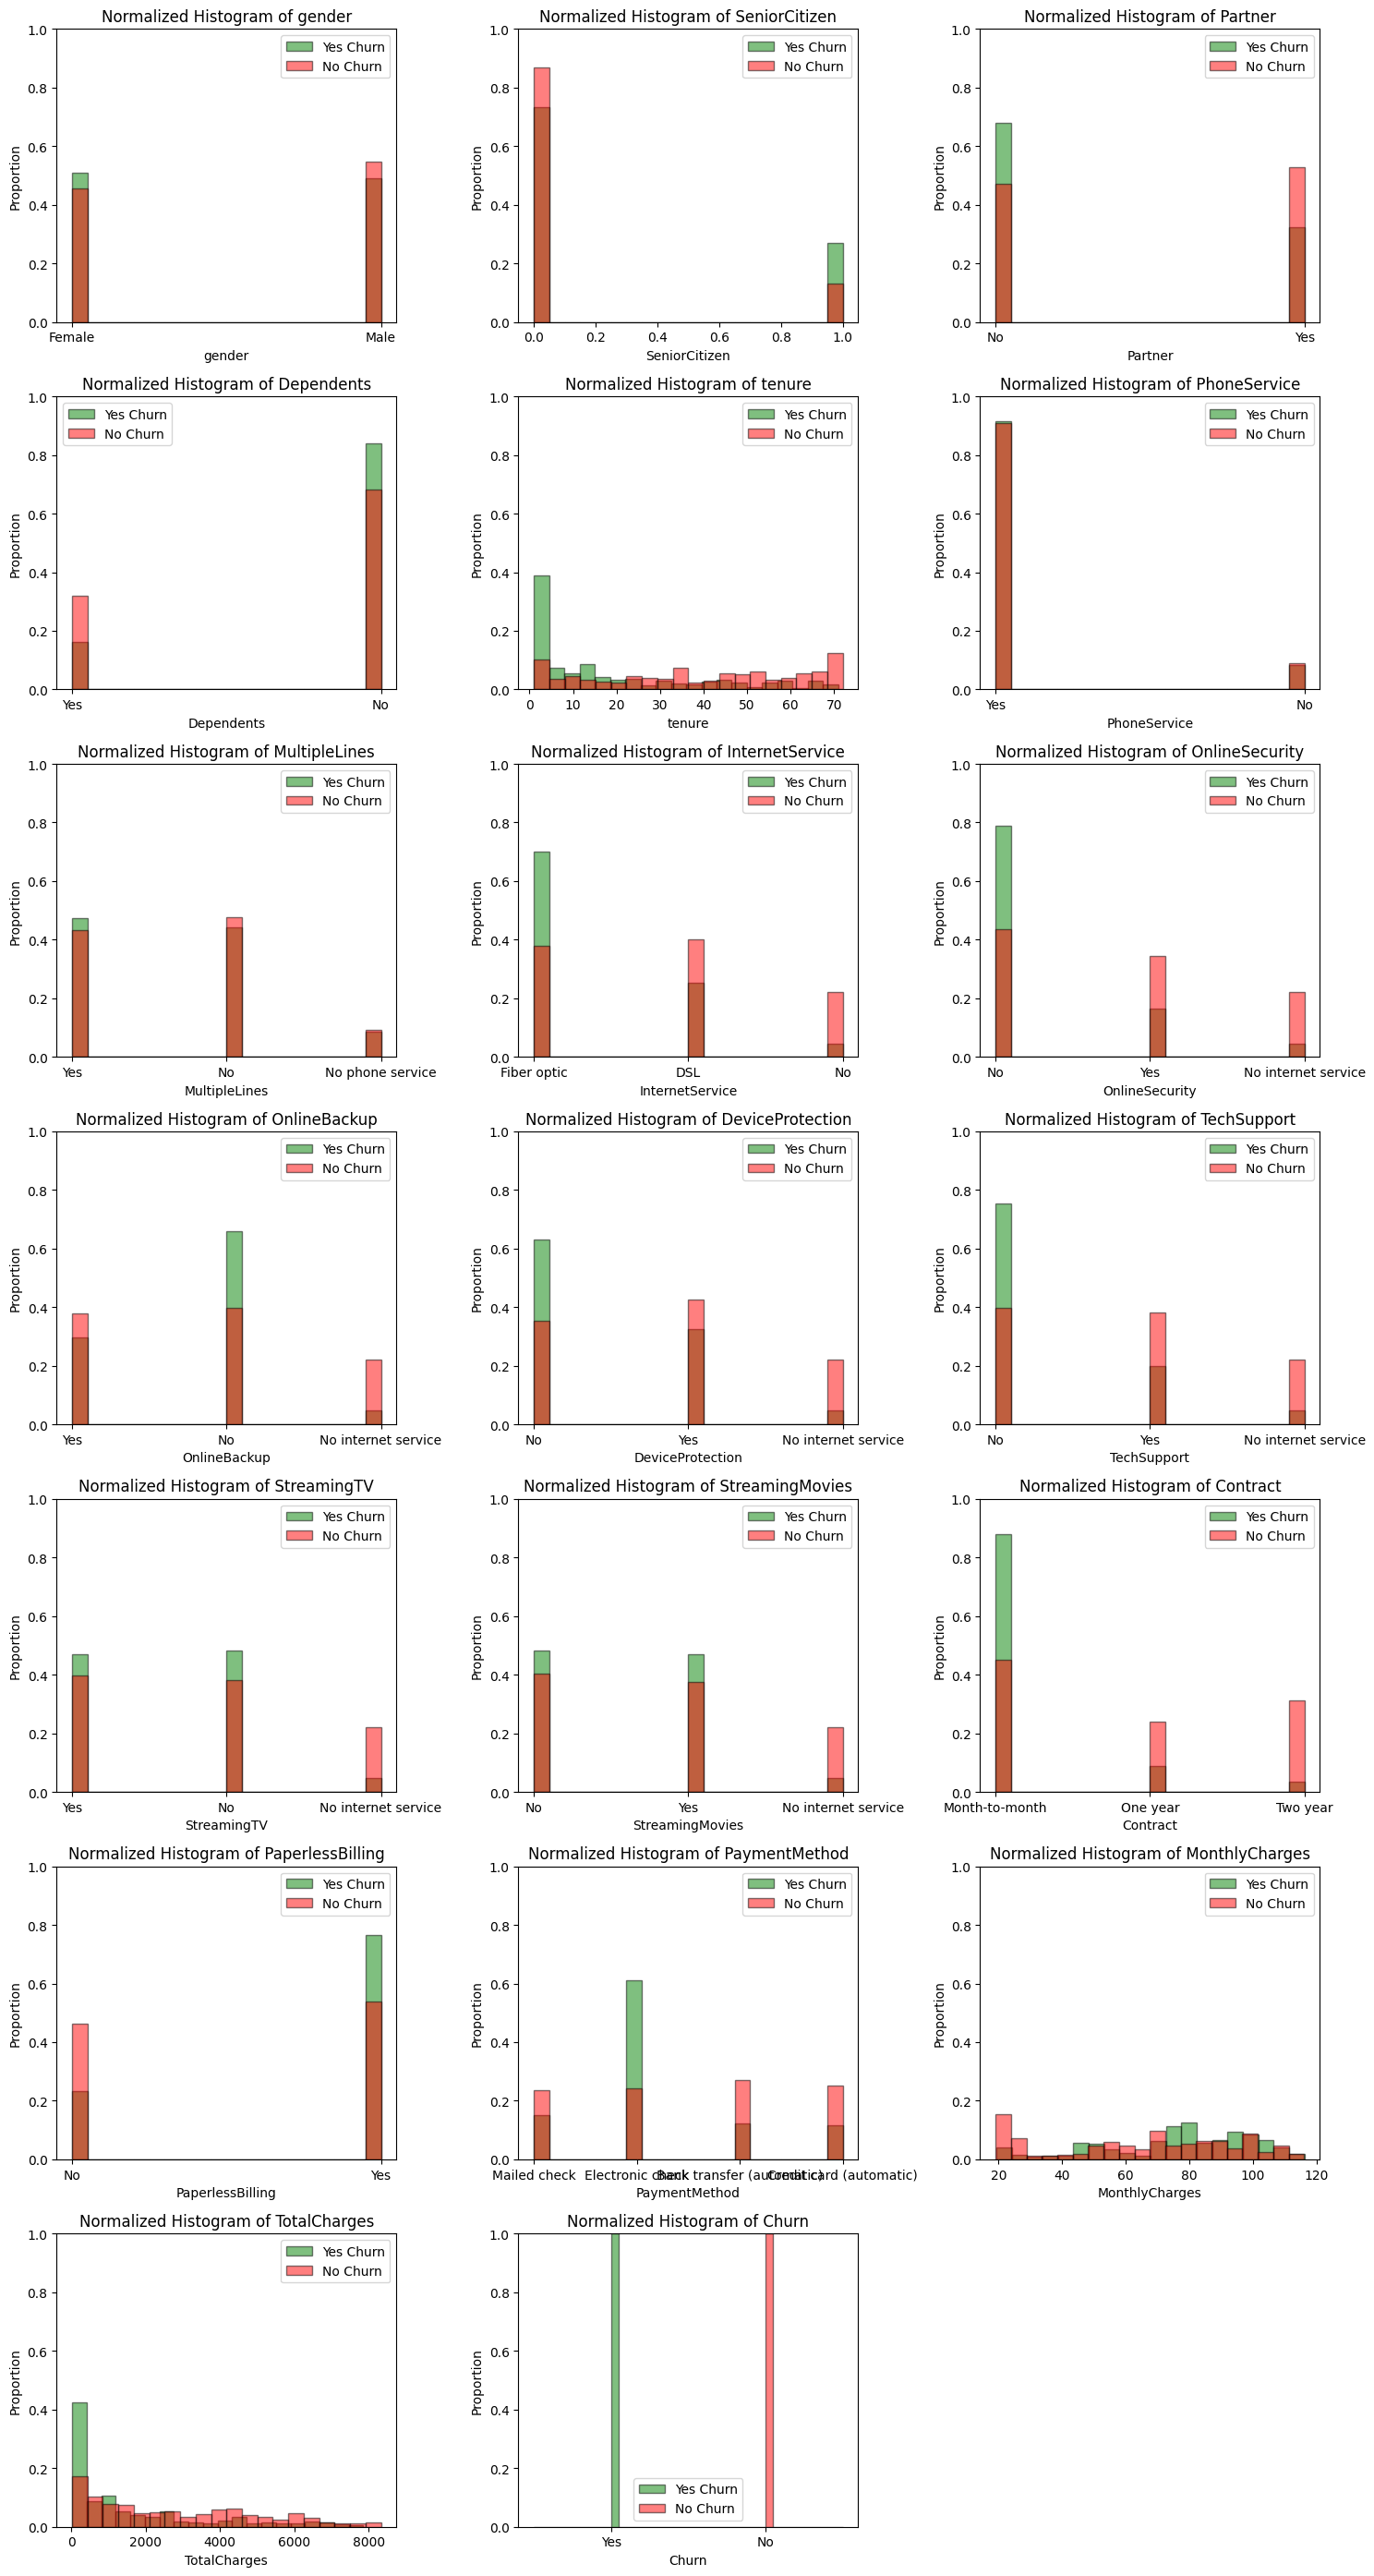

In [ ]:
merge_no=df_merge[df_merge['Churn']=="No"]
merge_yes=df_merge[df_merge['Churn']!="No"]


# Define columns for the comparison
numerical_columns = ['gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn']

# Determine layout
num_cols = 3
num_rows = int(np.ceil(len(numerical_columns) / num_cols))

# Plot histograms with normalized weights
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    # Drop NaNs to avoid errors
    yes_data = merge_yes[col].dropna()
    no_data = merge_no[col].dropna()

    # Normalize: each bar height reflects proportion
    weights_yes = np.ones(len(yes_data)) / len(yes_data)
    weights_no = np.ones(len(no_data)) / len(no_data)

    axes[i].hist(yes_data, bins=20, alpha=0.5, label='Yes Churn', color='green',
                 weights=weights_yes, edgecolor='black')
    axes[i].hist(no_data, bins=20, alpha=0.5, label='No Churn', color='red',
                 weights=weights_no, edgecolor='black')

    axes[i].set_title(f'Normalized Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].set_ylim(0, 1)
    axes[i].legend()

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()